# Charged Sphere Simulation

We will walk through the math to generate the equations for the enclosed charge, field and electric potential with respects to distances, produced by a charged sphere enclosed by a conducting shell. We will derive the equations for both outside and inside the sphere by defining the sphere's charge by its charge density (the charge per volumn) as opposed to its total charge. We will even take it another step by having the charge density be non-constant, changing depending on the distance from the center. 

Lets start by importing our libraries. We will use pandas and matplotlib later on to store our data and graph it, and we will also import the constant pi for our use throughout the simulation

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from math import pi

Our only physics constant is the value of vacuum permittivity ($\epsilon_0$) 

In [2]:
e0 = 8.854e-12

I also mentioned that we would be using a more general form for our charge density. We will use the exquation $\rho = cr^x$, where $r$ is the distance from the center and $c$ and $x$ are variables that we can change

Finally, lets define all of our simulation specific variables that we will alter as we see fit

In [3]:
R = 1   # radius of charged sphere

c = 1e-6   # Coefficient of charge density equation
x = 0   # Exponent of charge density equation (don't use -2 or -3 because the integration relies on the power rule and in both those cases will result in a 1/r)

CS = 2  # Conducting shell start
CE = 3  # Conducting shell end
qConducting = 1e-6  # Conducting shell's charge

# Ensures that the radius is positive and that the shell is outside the sphere and ends after it starts
if R < 0:
    R = 0
if CS <  R: 
    CS = R
if CE < CS: 
    CE = CS

## Define Our Functions
With that house keeping out of the way, lets now work out the equations and implement them as functions

### Charge:
$$q = \int_{} \rho dV$$
$$dV = 4 \pi r^2 dr$$
$$\rho = cr^x$$
Substituting these values, we get:
$$q = \int_{0}^r 4 \pi r^2 \bullet cr^x dr = \int_{0}^r 4 \pi c r^{x+2} dr = \frac{4 \pi c}{x+3} r^{x+3} \biggr|_{0}^r = \frac{4 \pi c}{x+3} r^{x+3}$$
But this equation only works inside the sphere because the charge stops changing outside the sphere, so we get the constant equation for the entire sphere to be:
$$q_{sphere} = \frac{4 \pi c}{x+3} R^{x+3}$$
We have to also consider what happens at in the conducting shell. In a conducting surface, the charges are arranged so that the charge and field within is $0$. <br>
Finally, outside the conducting shell, the total enclosed charge must be the sum of the net charge of the sphere and the shell ($q_{sphere} + q_{conducting}$)

*Note: a conducting material can still have a net charge even though the net enclosed charge is 0 because the charges are concentrated on the inner and outer surface*

In [4]:
# The sphere's total charge is constant and will be used in other places so we will precalculate it
qSphere = 4 * pi * c / (x + 3) * R ** (x + 3)

In [5]:
def calculateCharge(r: float) -> float:
    if r < R:
        return 4 * pi * c / (x + 3) * r ** (x + 3)
    elif r < CS:
        return qSphere
    elif r < CE:
        return 0
    else:
        return qSphere + qConducting

### Field:
Gauss's law states that:
$$\iint \limits_S  E \bullet dA = \frac{q}{\epsilon_0}$$
Where E is the field and dA is the surface normal as each point. The double integral can be simplified out if we use a sphere, because field is constant at a fixed radius and the surface normal and field are always pointing in the same direction. Using $4 \pi r^2$ (surface area of a sphere) for $A$, we are left with:
$$EA = \frac{q}{\epsilon_0} \rightarrow E = \frac{q}{A \epsilon_0} = \frac{q}{4 \pi \epsilon_0 r^2}$$
The nice thing is that because there is no integration, we can directly use the $q$ from the previous function so that is our final equation.<br>
But, because I know that there is integrate again later, we will do the out equation for field inside the sphere by plugging in the $q$ equation for inside the sphere (we don't need to do outside because they are constant in their ranges so won't have an affect on the integration):
$$E = \frac{\frac{4 \pi c}{x+3} r^{x+3}}{4 \pi r^2 \epsilon_0} = \frac{ c r^{x+1}}{(x+3) \epsilon_0} = \frac{c}{(x+3) \epsilon_0} r^{x+1}$$

In [6]:
def calculateField(r: float, q: float) -> float:
    if r == 0:
        return 0
    return q / (4 * pi * e0 * r ** 2)

### Potential 
The equation for potential is $\triangle V = -\int E dr$ and the standard convention is that the potential at $\infty$ is $0$, so $V(r) = \triangle V + V(\infty) = \triangle V$. We would like to just do $V(r) = -\int_\infty^r E dr$, but the field isn't a consistent function so we have to split into parts and add them together (e.g. from $\infty$ to the conducting shell's outer surface, from the conducting shell's outer to inner surface, etc.) <br>
Besides inside the sphere, which we will do last, the equation can be found by plugging in the basic equation for field (we will use generic bounds first):
$$\triangle V = -\int_a^b \frac{q}{4 \pi \epsilon_0 r^2} dr = \frac{q}{4 \pi \epsilon_0 r} \biggr|_a^b = \frac{q}{4 \pi \epsilon_0} \biggr( \frac{1}{b} - \frac{1}{a} \biggr)$$
From $\infty$ to $r$ (or the conducting shell outter surface, which ever comes first):
$$\triangle V = -\int_\infty^r E dr = \frac{q_{sphere} + q_{conducting}}{4 \pi \epsilon_0} \biggr( \frac{1}{r} - \frac{1}{\infty} \biggr) = \frac{q_{sphere} + q_{conducting}}{4 \pi \epsilon_0 r}$$
From the conducting shell's outer to inner surface we could do it out, but because the charge is 0, the $\triangle V$ must also be $0$ <br>
From the conducting shell's inner surface to $r$ (or the sphere's surface, if it comes first):
$$\triangle V = -\int_{CS}^r E dr = \frac{q_{sphere}}{4 \pi \epsilon_0} \biggr(\frac{1}{r} - \frac{1}{CS}\biggr)$$
Finally, the $\triangle V$ from the sphere's surface to $r$ (or center) is a little more complicated because the charge inside the sphere is dependant on the radius. Because of this, we must use the field equation inside the sphere in terms of $r$ for our integration:
$$V = -\int_R^r E dr = \int_r^R \frac{c}{(x+3) \epsilon_0} r^{x+1} dr = \frac{c}{(x+3) \epsilon_0} \biggr(\frac{1}{x+2}r^{x+2} \biggr|_r^R \biggr) = \frac{c}{(x+3)(x+2) \epsilon_0} (R^{x+2} - r^{x+2}) $$
With all those equations, all we have to do is sum them together to get the total change in potential. 

*Note: In the code I start from the inside, working outwards, and set the r to the next border after adding each portion. This has the same result because addition is communicative and means that we don't have to check whether to use $r$ or the boundary each time*

In [7]:
def calculatePotential(r: float) -> float:
    sum = 0
    if (r <= R):
        sum += c / ((x + 3) * (x + 2) * e0) * (R ** (x + 2) - r ** (x + 2))
        r = R
    if (r <= CS):
        sum += qSphere / (4 * pi * e0) * (1 / r - 1 / CS)
        r = CS
    if (r <= CE):
        # sum += 0
        r = CE
    sum += (qSphere + qConducting) / (4 * pi * e0 * r)
    return sum

## Lets Get the Data
Now that we have created all the functions, all that is left is to actually calculate everything and graph it

Bellow is all the variables that can be changed, to change anything, all you have to do is alter the values here and rerun everything bellow

In [8]:
R = 1   # radius of charged sphere

c = -1e-6   # Coefficient of charge density equation
x = 0   # Exponent of charge density equation (don't use -2 or -3 because the integration relies on the power rule and in both those cases will result in a 1/r)

CS = 2  # Conducting shell start
CE = 3  # Conducting shell end
qConducting = 1e-6  # Conducting shell's charge

# Ensures that the radius is positive and that the shell is outside the sphere and ends after it starts
if R < 0:
    R = 0
if CS <  R: 
    CS = R
if CE < CS: 
    CE = CS

qSphere = 4 * pi * c / (x + 3) * R ** (x + 3)

In [9]:
maxDistanceMultiplier = 4  # The number of R's that that max distance to graph is at
maxDistance = maxDistanceMultiplier * R
stepsPerR = 1000
dr = R / stepsPerR

data = pd.DataFrame(index=range(0, maxDistanceMultiplier * stepsPerR + 1), columns=["Distance", "Charge", "Field", "Potential"])

# populate the data
d = 0
for i in range(0, maxDistanceMultiplier * stepsPerR + 1):
    q = calculateCharge(d)
    E = calculateField(d, q)
    V = calculatePotential(d)
    data.loc[i] = [d, q, E, V]  # sets the values at index i to these values
    d += dr

Text(0.5, 0, 'Distance (m)')

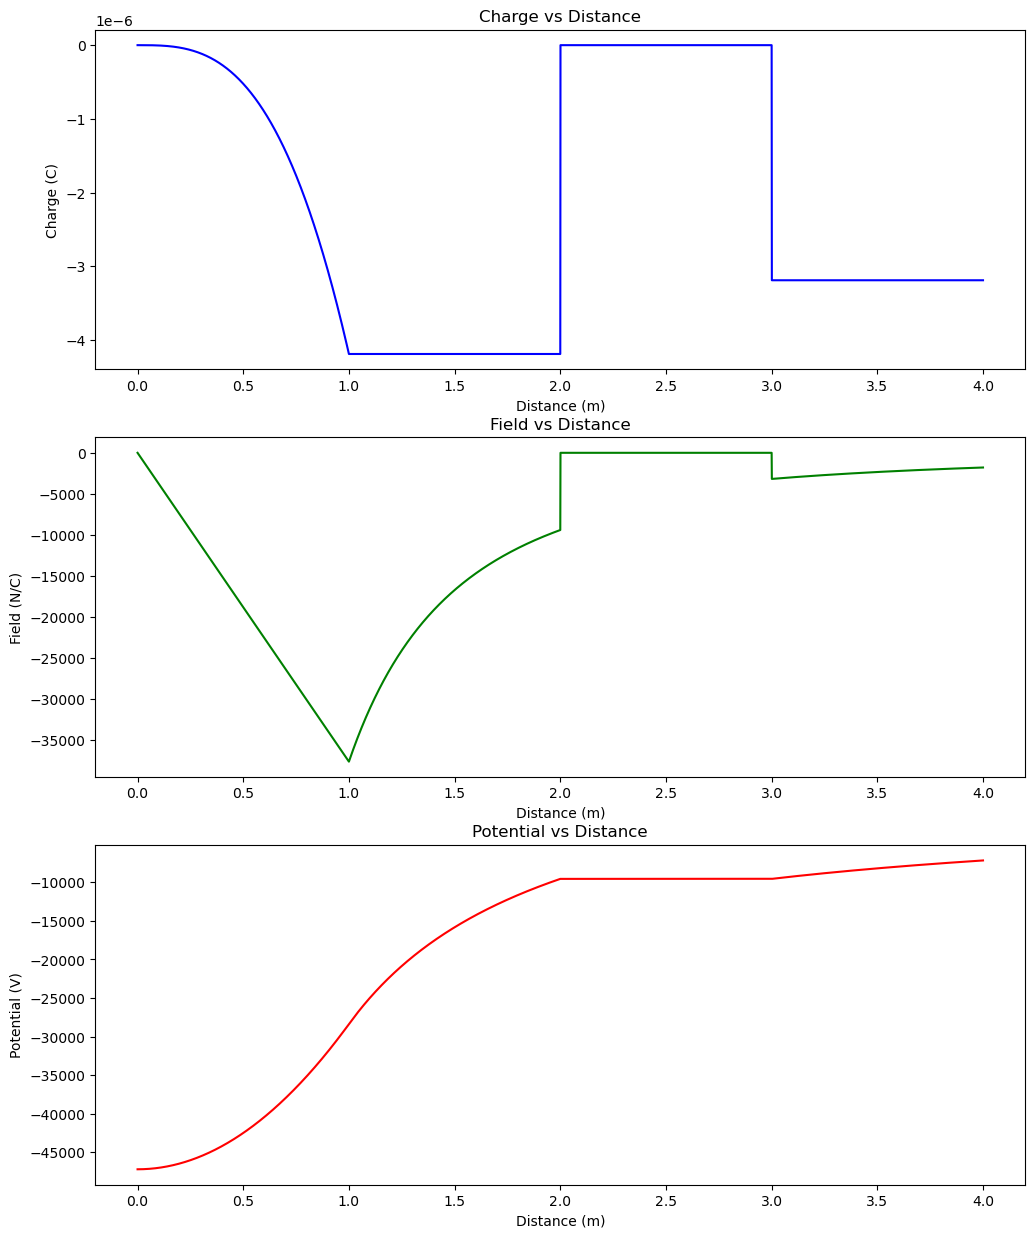

In [10]:
# Graph the data
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

axs[0].set_title("Charge vs Distance")
axs[0].plot(data["Distance"], data["Charge"], 'b')
axs[0].set_ylabel("Charge (C)")
axs[0].set_xlabel("Distance (m)")

axs[1].set_title("Field vs Distance")
axs[1].plot(data["Distance"], data["Field"], 'g')
axs[1].set_ylabel("Field (N/C)")
axs[1].set_xlabel("Distance (m)")

axs[2].set_title("Potential vs Distance")
axs[2].plot(data["Distance"], data["Potential"], 'r')
axs[2].set_ylabel("Potential (V)")
axs[2].set_xlabel("Distance (m)")

If you want to play around with the data itself, [pandas's DataFrame](https://pandas.pydata.org/docs/reference/frame.html) (what we used instead of a standard array) is very good with indexing and filtering, see their [documentation](https://pandas.pydata.org/docs/reference/frame.html) for more information (or look up if you have something specific in mind)

## Conclusion
There you go, you have just done all the calculus and physics to create equations for the charge, field, and potential caused by a sphere of non-uniform charge density as functions of distance from the center. There are so many cool things that you can do with this concept. The simplest addition to test you knowledge would be to make it possible to make the sphere hollow. You could also make the charge density even more general, there are libraries out that that allow you to integrate functions. You could even generalize these equations so you could have as many conducting and non-conducting shells as you want, maybe you could store them as a list of the start, end, whether it is conducting or not, and it's charge density equation. Those are just the first things that came to mind, there are endless ways that you could expand on this topic and I will leave that up to you. I hope that this has furthered you understanding of electric charge, field and potential and maybe inspired you to learn more.

## Bonus
I was about to wrap it all up, but realized how easy it would be to visualize the electric field as a vector field graph (just another example of the limitless possiblities to do further exploration of this topic).

In [10]:
import numpy as np
from matplotlib import patches

/var/folders/6n/d7s92wqx73x9hv47jr74q9rr0000gn/T/ipykernel_4956/1359840066.py:35: RuntimeWarning: invalid value encountered in divide
  bU, bV = bU / magnitudes, bV / magnitudes


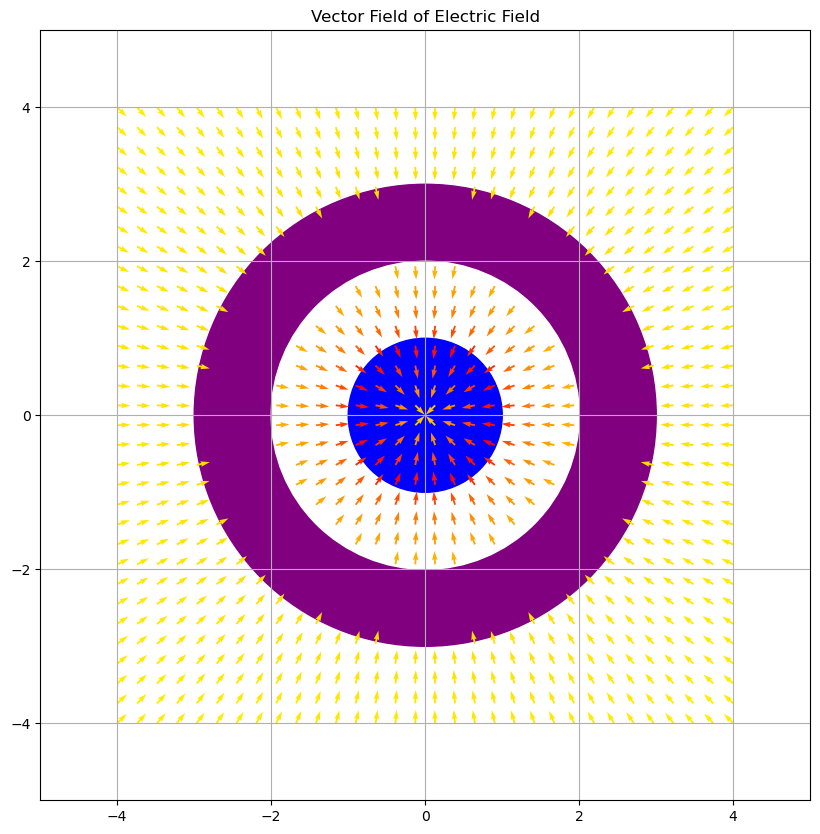

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid()

ax.set_title('Vector Field of Electric Field') 

# Draw sphere and shell
ax.add_patch(patches.Circle((0, 0), radius=CE, color='purple'))
ax.add_patch(patches.Circle((0, 0), radius=CS, color='white'))
ax.add_patch(patches.Circle((0, 0), radius=R, color='blue'))

bX, bY = np.meshgrid(np.linspace(-maxDistance, maxDistance, 32),  
                           np.linspace(-maxDistance, maxDistance, 32)) 
  
# Allows functions to act elementwise
vectorizedCalcCharge = np.vectorize(calculateCharge)
vectorizedCalcField = np.vectorize(calculateField)

rs = np.sqrt(bX**2 + bY**2)
Es = vectorizedCalcField(rs, vectorizedCalcCharge(rs))

# Calculates the x and y components of the electric field vectors
bU = bX / rs * Es 
bV = bY / rs * Es

# Determines the color based on how long it is
magnitudes = np.abs(Es)
maxMagnitude = np.max(magnitudes)
toColor = lambda magnitude : [1, 0.95 * (1 - magnitude / maxMagnitude), 0]
colors = np.array(list(map(toColor, magnitudes.flatten())))

# unitizes the vectors
bU, bV = bU / magnitudes, bV / magnitudes

ax.quiver(bX, bY, bU, bV, color=colors) 
 
plt.show() 

This quick diagram perfectly demonstrates that the field increases as it moves outward from the center, peaks at the sphere surface (the long, red vectors), decreases after it is outside the sphere, goes to  inside the conducting shell, then picks back up again outside the shell. A pretty cool example of what you can do with these functions.